In [18]:
### Run this cell before continuing
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("tests.R")
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

download.file(url, destfile = "winequality-white.csv")
white_wine <- read_delim("winequality-white.csv", delim = ";")
white_wine
     

In [4]:
white_wine <- white_wine |>
    mutate(quality = as_factor(quality))

View(white_wine)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


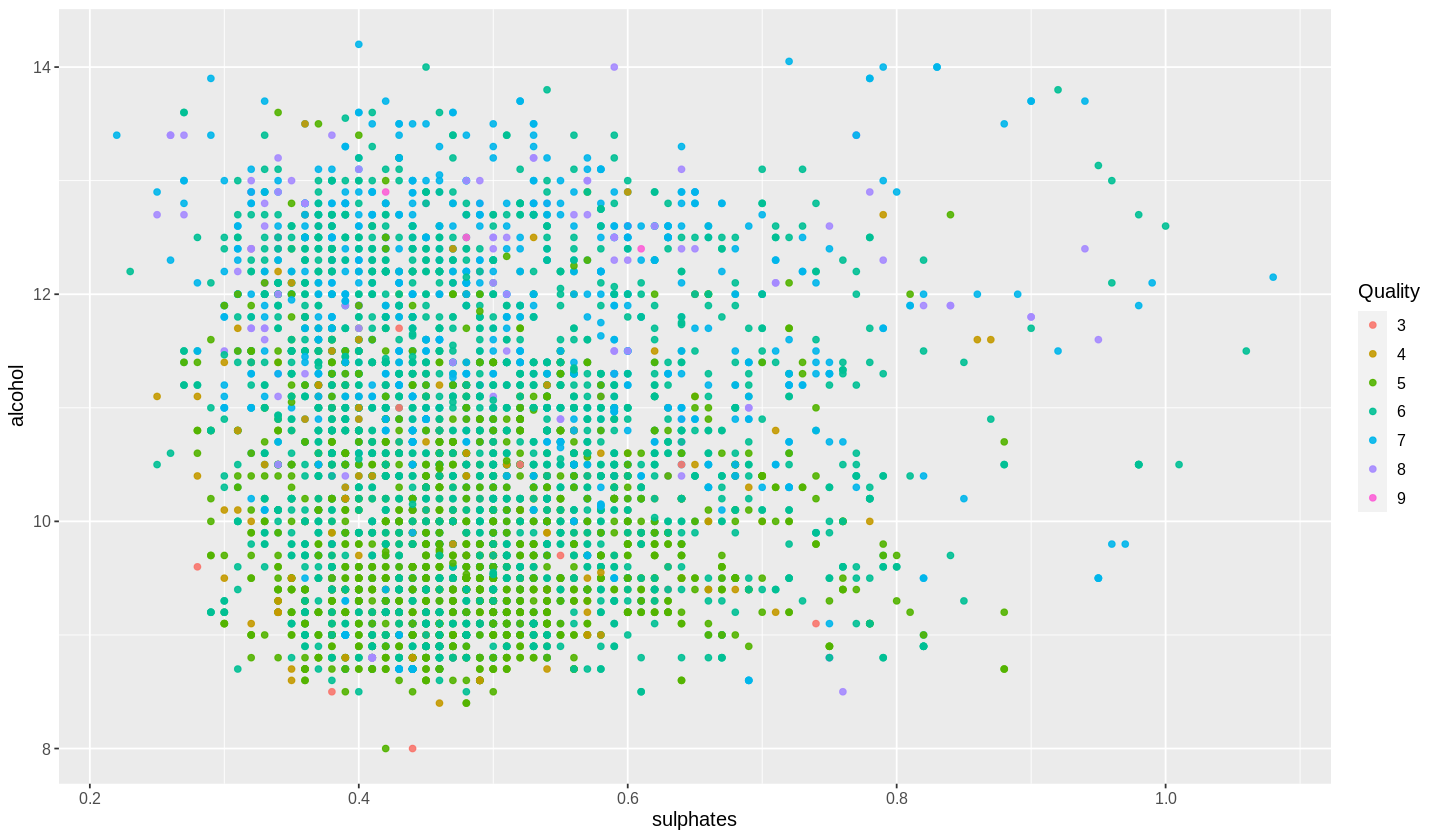

In [24]:
white_wine_plot <- white_wine |>
  ggplot(aes(x = sulphates, y = alcohol, color = quality)) +
  geom_point(alpha = 0.9) +
  labs(color = "Quality") +
  #scale_color_manual(labels = c("4", "5", "6", "7", "8"), 
   #                  values = c("orange2", "steelblue2")) + 
  theme(text = element_text(size = 12))

white_wine_plot

In [25]:
set.seed(1234)

ww_split <- initial_split(white_wine, prop = 0.75, strata = quality)
ww_train <- training(ww_split)
ww_test <- testing(ww_split)

glimpse(ww_train)

Rows: 3,673
Columns: 12
$ `fixed acidity`        <dbl> 8.6, 8.3, 6.5, 6.8, 5.8, 7.3, 6.2, 6.9, 7.0, 6.…
$ `volatile acidity`     <dbl> 0.230, 0.420, 0.310, 0.260, 0.270, 0.240, 0.460…
$ `citric acid`          <dbl> 0.40, 0.62, 0.14, 0.42, 0.20, 0.39, 0.25, 0.35,…
$ `residual sugar`       <dbl> 4.20, 19.25, 7.50, 1.70, 14.95, 17.95, 4.40, 5.…
$ chlorides              <dbl> 0.035, 0.040, 0.044, 0.049, 0.044, 0.057, 0.066…
$ `free sulfur dioxide`  <dbl> 17.0, 41.0, 34.0, 41.0, 22.0, 45.0, 62.0, 32.0,…
$ `total sulfur dioxide` <dbl> 109.0, 172.0, 133.0, 122.0, 179.0, 149.0, 207.0…
$ density                <dbl> 0.9947, 1.0002, 0.9955, 0.9930, 0.9962, 0.9999,…
$ pH                     <dbl> 3.14, 2.98, 3.22, 3.47, 3.37, 3.21, 3.25, 3.36,…
$ sulphates              <dbl> 0.53, 0.67, 0.50, 0.48, 0.37, 0.36, 0.52, 0.48,…
$ alcohol                <dbl> 9.7, 9.7, 9.5, 10.5, 10.2, 8.6, 9.8, 9.8, 10.5,…
$ quality                <fct> 5, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 8, 5,…


In [26]:
ww_proportions <- ww_train |>
                      group_by(quality) |>
                      summarize(n = n()) |>
                      mutate(percent = 100*n/nrow(ww_train))
ww_proportions

quality,n,percent
<fct>,<int>,<dbl>
3,14,0.3811598
4,121,3.2943098
5,1091,29.7032399
⋮,⋮,⋮
7,665,18.1050912
8,129,3.5121154
9,3,0.0816771


In [ ]:
set.seed(1)

ww_recipe <- recipe(quality ~ sulphates + alcohol, data = ww_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

In [27]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_spec) |>
  fit(data = ww_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4222706
Best kernel: rectangular
Best k: 3

In [13]:


##(4)##
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

##(2)##
ww_vfold <- vfold_cv(ww_train, v = 10, strata = quality)
gridvals <- tibble(neighbors = seq(1, 10))

##(5)##
ww_results <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = ww_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

! Fold02: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold04: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold05: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold06: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold08: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold09: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.

! Fold10: internal:
  No observations were detected in `truth` for level(s): '9'
  Computation will proceed by ignoring those levels.



ERROR while rich displaying an object: Error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (10): y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_t

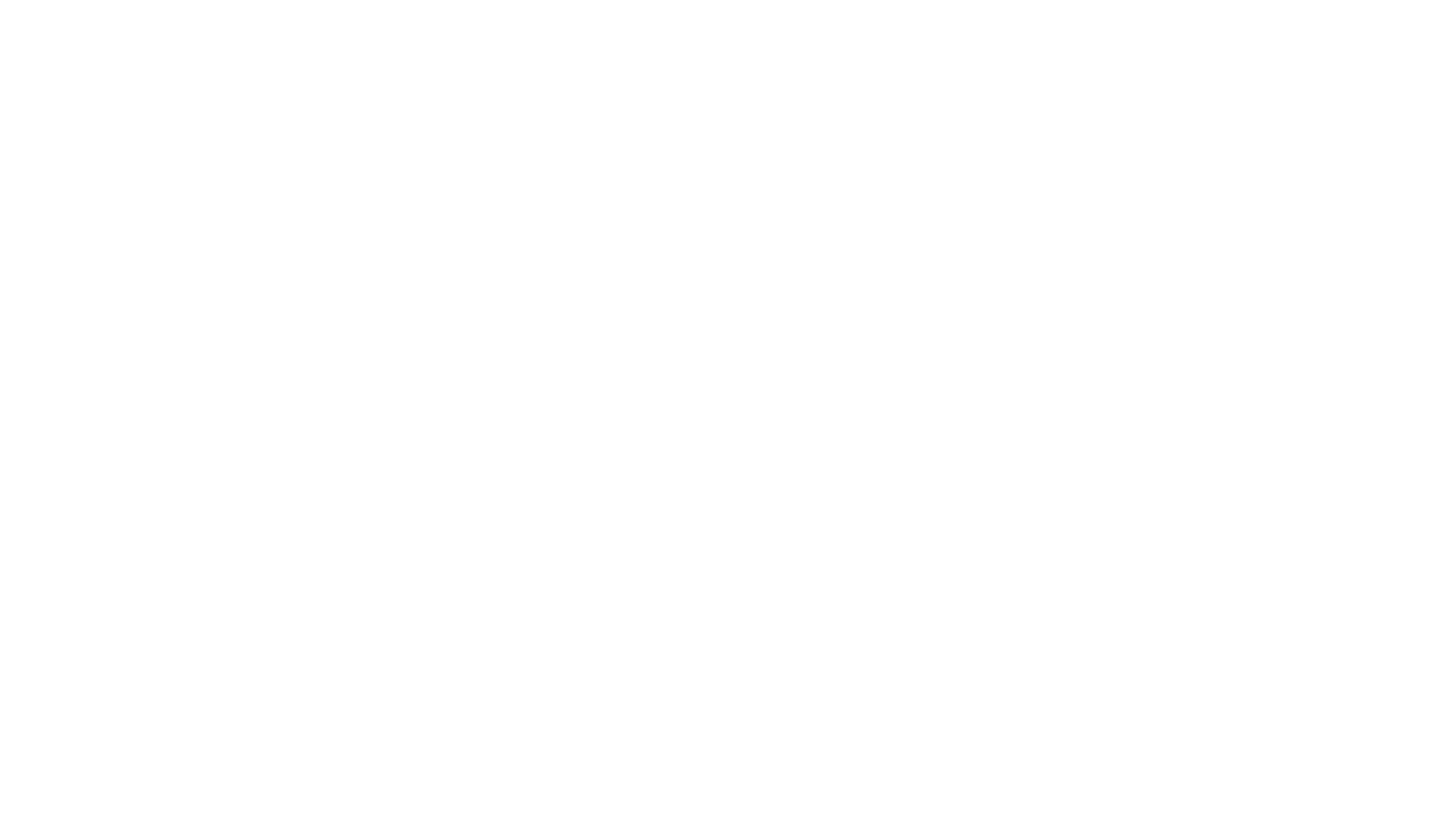

In [14]:
options(repr.plot.width = 12, repr.plot.height = 7)

ky <- ww_results |>
    filter(neighbors == 13) |>
    select(mean) |>
    pull()

cross_val_plot <- ww_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 13, colour = "red") +
    geom_point(aes(x = 13, y = ky), size = 4, colour = "blue") +
    labs(x = "\nNeighbours",
         y = "Accuracy Estimate\n",
         title = "Estimated Accuracies of k Neighbours") +
    scale_x_continuous(limits = c(1, 25),
                       breaks = seq(1, 25),
                       minor_breaks = seq(1, 25, 1)) +
    theme(text = element_text(size = 20),
          plot.caption = element_text(size = 20, hjust = 0))

cross_val_plot

In [15]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 13) |>
  set_engine("kknn") |>
  set_mode("classification")

ww_fit <- workflow() |>
  add_recipe(ww_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = ww_train)

##(8)##
# Get the prediction column
ww_predictions <- predict(ww_fit, ww_test) |> 
    bind_cols(ww_test)

ww_predictions

.pred_class,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
6,8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12.0,5
6,7.9,0.18,0.37,1.20,0.040,16,75,0.9920,3.18,0.63,10.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5,6.6,0.34,0.40,8.1,0.046,68,170,0.99494,3.15,0.50,9.55,6
6,6.2,0.41,0.22,1.9,0.023,5,56,0.98928,3.04,0.79,13.00,7
6,6.5,0.23,0.38,1.3,0.032,29,112,0.99298,3.29,0.54,9.70,5


In [16]:
# Compare the accuracy of predictions to the true values in the test set
ww_acc <- ww_predictions |> 
    metrics(truth = quality, estimate = .pred_class) |>
    select(.metric, .estimate) |> 
    head(1)

ww_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.4612245


In [17]:
# Compare the predictions to the true values in a confusion matrix
ww_cm <- ww_predictions |> 
    conf_mat(truth = quality, estimate = .pred_class)
ww_cm

          Truth
Prediction   3   4   5   6   7   8   9
         3   0   0   0   0   0   0   0
         4   0   0   0   0   0   0   0
         5   1  17 178 158  28   3   0
         6   5  20 160 326 127  25   1
         7   0   5  24  63  59  16   1
         8   0   0   4   1   1   2   0
         9   0   0   0   0   0   0   0